***1.1 SETUP AND LOAD DATA***

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


tensorflow and tensorflow gpu to build pipeline
openCV to remove dodgy images, mathplotlib to visualize images

In [ ]:
import tensorflow as tf
import os

os for navigating file structure

In [ ]:
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

Avoids OOM errors bby setting GPU Memomy Consumption Growth. Sets memory to min

***1.2 REMOVE DODGY IMAGES***

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

<ipython-input-5-45c64f998d76>:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving data.zip to data.zip


In [ ]:
!unzip data.zip -d /content/

Archive:  data.zip
replace /content/data/happy/05-12-21-happy-people.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/happy/05-12-21-happy-people.jpg  
replace /content/data/happy/170404-happy-workers-feature.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/happy/170404-happy-workers-feature.jpg  
replace /content/data/happy/24px.svg? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace /content/data/happy/24px.svg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/happy/24px.svg  
replace /content/data/happy/25115.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/data/happy/25115.jpg  
  inflating: /content/data/happy/2983960_stock-photo-happy-people.jpg  
  inflating: /content/data/happy/343515-worldhappinessreport1440.jpg  
  inflating: /content/data/happy/35438_hd.jpg  
  inflating: /content/data/happy/360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg  
  inflating: /conte

imghdr checks file extensions for particular images

In [ ]:
data_dir='data'

In [ ]:
os.listdir(data_dir)

['happy', 'sad']

In [ ]:
image_exts=['jpeg','jpg','bmp','png']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    print(image)

happy-people-yellow-t-shirts-jumping-celebrating-victory-iso.jpg
happy-people (1).jpg
web3-happy-people-outside-smile-sun-nature-eduardo-dutra-620.jpg
image (4).png
ACg8ocJIl8bGyfOU8ERUzR0KBtbXLArOQK5dRBvQlsfCc8Oh8s7ohg-s128-.png
image (2).svg
image (1).svg
Overtly-Cheerful-Primer-Editorials-min.png
Super-Happy-People-yay.jpg
A_Sep20_14_1189155141.jpg
images (4).jpeg
_happy_jumping_on_beach-40815.jpg
image.svg
p_1x_d3198aa67424.png
happy-indian-mother-having-fun-with-her-daughter-outdoor-fam.jpg
image (6).jpeg
images (1).jpeg
image (7).svg
al-icon.png
iStock-1283955441.jpg
image (3).svg
image (5).jpeg
file-20230208-27-3jttof.jpg
2983960_stock-photo-happy-people.jpg
compassion-900x387.jpg
group-young-multiracial-friends-enjoying-freedom-together-ha.jpg
image (6).svg
image (3).jpeg
friends_190412.jpg
image (9).svg
best_crop_3e56ddfed9ee642b4839_6d687bf0-cd02-43d8-938a-c2743.jpg
image (4).svg
happy-multigenerational-people-having-fun-sitting-on-grass-i.jpg
170404-happy-workers-feature.jpg

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

Image not in ext list data/happy/image (2).svg
Image not in ext list data/happy/image (1).svg
Image not in ext list data/happy/Overtly-Cheerful-Primer-Editorials-min.png
Image not in ext list data/happy/image.svg
Image not in ext list data/happy/happy-indian-mother-having-fun-with-her-daughter-outdoor-fam.jpg
Image not in ext list data/happy/image (7).svg
Image not in ext list data/happy/image (3).svg
Image not in ext list data/happy/image (6).svg
Image not in ext list data/happy/image (9).svg
Image not in ext list data/happy/image (4).svg
Image not in ext list data/happy/happy-multigenerational-people-having-fun-sitting-on-grass-i.jpg
Image not in ext list data/happy/image (16).svg
Image not in ext list data/happy/istock-508455188-033183f45ba393ed4745b2dd1213c390.jpg
Image not in ext list data/happy/multicultural-group-of-people-is-standing-together-team-of-c.jpg
Image not in ext list data/happy/image (5).svg
Image not in ext list data/happy/67891c01e6414a49171f7cdd_670dc58a1a95655104

***1.3 LOAD DATA***

In [ ]:
tf.data.Dataset??

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
 data=tf.keras.utils.image_dataset_from_directory('data')

Found 208 files belonging to 2 classes.


Builds a data pipeline

In [ ]:
data_iterator=data.as_numpy_iterator()

Helps to access that data pipeline

In [ ]:
batch=data_iterator.next()

Can get another batch from iterator.
Image and label storage as 2 different units

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
#Class 1= SAD
#Class 0 = Happy
batch[1]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int32)

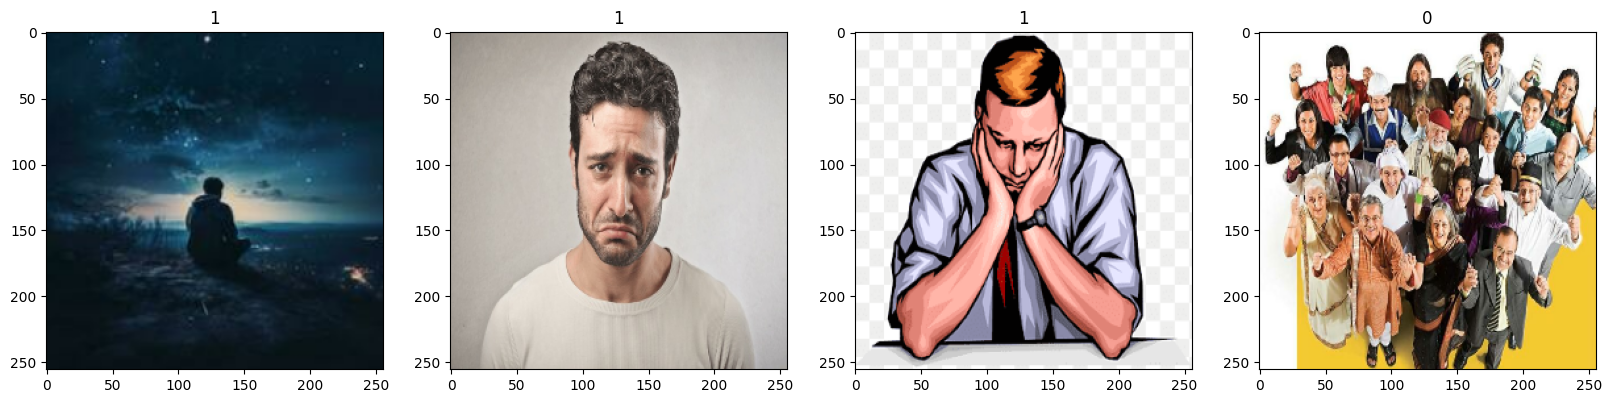

In [ ]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

1 for sad people and 0 for happy people

***2.PREPROCESS DATA***

***2.1 Scale data***

In [ ]:
data=data.map(lambda x,y: (x/255,y))

data.map allows transformation in pipeline
lambda allows us to go in the pipeline
x is images
y is target variable
x/255 for scaling

In [ ]:
scale_iterator=data.as_numpy_iterator()
batch=scale_iterator.next()

In [ ]:
batch[0].max()

1.0

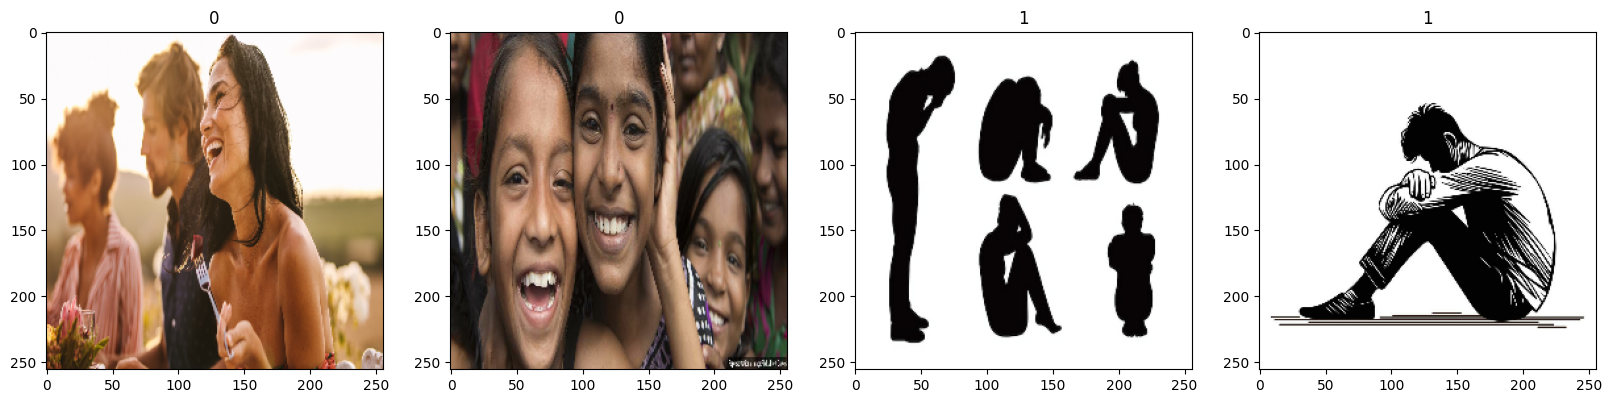

In [ ]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

data is now scaled

***2.2 Split Data***

In [ ]:
len(data)

7

In [ ]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

Train data used to train the dataset
Validation data used to evaluate while training
Test data for last stage

In [ ]:
train_size+val_size+test_size

7

In [ ]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

***3 DEEP MODEL***

*3.1 Build deep learning model*

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

Sequential for quick and easy deep learning classifiaction
Conv2D for 2D convolutional layer, MaxPooling2D for condensing, Dense for fully connected layer, Dropout for regularization

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


(architectural decision)First layer is convolutional layer which 16 filters and has 3,3 pixels in size and 1 stride, relu activation applied which takes output from conv layer and converts the values for non linear patterns, input shape(height,width and depth).

MaxPooling 2D condenses the layer.

Flatten helps to flatten the layers to 1D vector, makes it compatible with Dense layer.

Dense are fully connected layer




In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

Using the adam optimizer

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

***3.2 Train***

In [ ]:
logdir='logs'

In [ ]:

tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 727ms/step - accuracy: 0.4156 - loss: 1.1354 - val_accuracy: 0.4688 - val_loss: 0.7275
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4615 - loss: 0.7410 - val_accuracy: 0.4688 - val_loss: 0.6895
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 658ms/step - accuracy: 0.5031 - loss: 0.6882 - val_accuracy: 0.5625 - val_loss: 0.6868
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5615 - loss: 0.6892 - val_accuracy: 0.5000 - val_loss: 0.6902
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6281 - loss: 0.6870 - val_accuracy: 0.7500 - val_loss: 0.6768
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7219 - loss: 0.6675 - val_accuracy: 0.6094 - val_loss: 0.6601
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6490 - loss: 0.6445 - val_accuracy: 0.6562 - val_loss: 0.6278
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7281 - loss: 0.6120 - val_accuracy: 0.6094 - val_loss: 0.6242
Epoch 9/20

Fit is the training component and predict is when we actually make predictions, epochs is how long are we going to train for.
1 epochs = 1 training data

In [ ]:
hist.history

{'accuracy': [0.4609375,
  0.4921875,
  0.5078125,
  0.5390625,
  0.671875,
  0.7109375,
  0.6796875,
  0.671875,
  0.7265625,
  0.84375,
  0.8359375,
  0.828125,
  0.8125,
  0.8359375,
  0.859375,
  0.8671875,
  0.8984375,
  0.875,
  0.8984375,
  0.84375],
 'loss': [1.1011841297149658,
  0.7204568982124329,
  0.6885226368904114,
  0.6890815496444702,
  0.6848477721214294,
  0.6624356508255005,
  0.6337838768959045,
  0.6563211679458618,
  0.5989967584609985,
  0.5333516597747803,
  0.45215922594070435,
  0.4181053936481476,
  0.42056357860565186,
  0.3903164863586426,
  0.3744727373123169,
  0.31122690439224243,
  0.2696976959705353,
  0.25389325618743896,
  0.23013842105865479,
  0.28351786732673645],
 'val_accuracy': [0.46875,
  0.46875,
  0.5625,
  0.5,
  0.75,
  0.609375,
  0.65625,
  0.609375,
  0.875,
  0.796875,
  0.828125,
  0.859375,
  0.859375,
  0.859375,
  0.859375,
  0.875,
  0.875,
  0.90625,
  0.921875,
  0.96875],
 'val_loss': [0.7275203466415405,
  0.6894780993461609,

***3.3 Plot Performance***

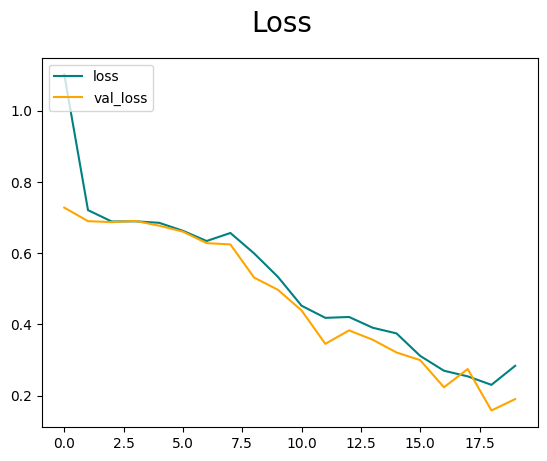

In [ ]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

Loss plotting

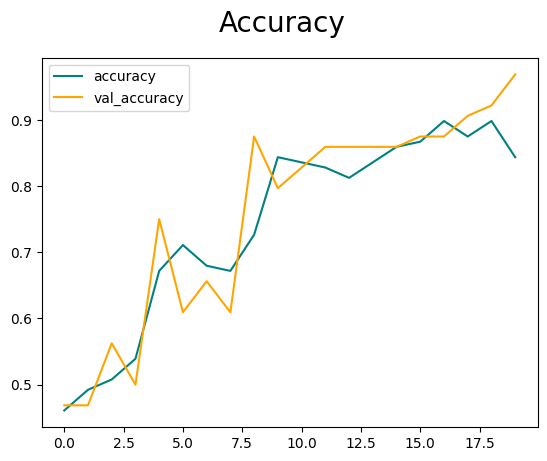

In [ ]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')

Accuracy plotting

***4. EVALUATE PERFORMANCE***

***4.1 Evaluate***

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  x, y=batch
  yhat=model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.8571428656578064, Recall:0.8571428656578064, Accuracy:0.875


Giving us high precision, recall and accuracy means  out model is working well.

***4.2 Test***

In [57]:
!unzip download.zip -d /content/

Archive:  download.zip
  inflating: /content/download.jpg   


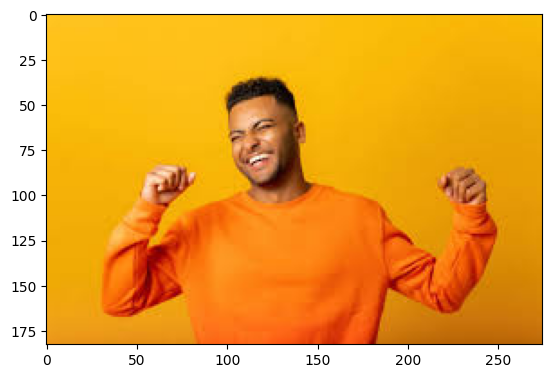

In [59]:
import cv2
img=cv2.imread('download.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

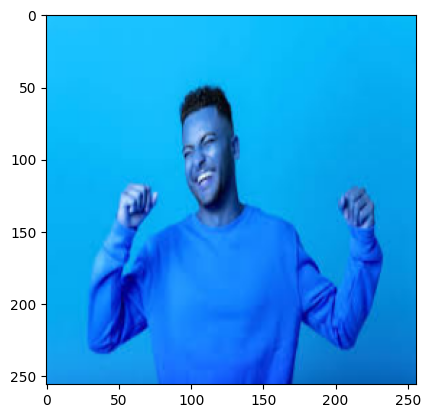

In [62]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [63]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


In [64]:
yhat

array([[0.27714112]], dtype=float32)

It is closer to 0 that is less than 50% and 0 was class happy. Hence predicted is happy.

In [65]:
if yhat > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Happy


***Save Model***

***5.1 Save the model***

In [66]:
from tensorflow.keras.models import load_model

In [67]:
model.save(os.path.join('models','Moodclassifier.h5'))

In [68]:
new_model=load_model(os.path.join('models','Moodclassifier.h5'))

In [69]:
yhatnew=new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


In [70]:
if yhatnew > 0.5:
  print(f'Predicted class is sad')
else:
  print(f'Predicted class is happy')

Predicted class is happy
